# Visualizations

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
import pickle

In [2]:
def visualize_graph(G: nx.Graph, title: str = "Graph Visualization", save_path: str = None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    node_colors = []
    node_sizes = []
    for n, attr in G.nodes(data=True):
        if attr.get('activated', False):
            if attr.get('golden', False):
                node_colors.append('pink')
            else:
                node_colors.append('red')
        elif attr.get('golden', False):
            node_colors.append('yellow')
        else:
            node_colors.append('lightblue')

        if attr.get('activated', False) or attr.get('golden', False):
            node_sizes.append(80)
        else:
            node_sizes.append(10)

    # Draw nodes and edges
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        edgecolors='black',
        linewidths=0.5,
        alpha=0.6
    )
    nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

    # Add labels for golden and activated nodes (larger, light blue)
    labels = {n: str(n) for n, attr in G.nodes(data=True)
              if attr.get('golden', False) or attr.get('activated', False)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=7, font_color='black', font_weight='bold')

    # Legend
    legend_patches = [
        mpatches.Patch(color='red', label='Activated'),
        mpatches.Patch(color='yellow', label='Golden'),
        mpatches.Patch(color='pink', label='Activated + Golden'),
        mpatches.Patch(color='lightblue', label='Other')
    ]
    plt.legend(handles=legend_patches, loc='upper right', fontsize=8, frameon=True)

    plt.title(title, fontsize=11, pad=10)
    plt.axis('off')
    plt.tight_layout()

    # --- Save or show ---
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Graph saved to: {save_path}")
        plt.close()
    else:
        plt.show()


def visualize_diffusion(G: nx.Graph, title: str = "Graph Visualization", save_path: str = None):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)

    # --- Summary stats ---
    total = G.number_of_nodes()
    reached = 0
    total_gold = 0
    reached_gold = 0

    # --- Node colors and sizes ---
    node_colors = []
    node_sizes = []
    for n, attr in G.nodes(data=True):
        if attr.get('activated', False):
            reached += 1
            if attr.get('golden', False):
                node_colors.append('pink')
                total_gold += 1
                reached_gold += 1
            else:
                node_colors.append('red')
        elif attr.get('golden', False):
            total_gold += 1
            node_colors.append('yellow')
        else:
            node_colors.append('lightblue')

        node_sizes.append(80 if (attr.get('activated', False) or attr.get('golden', False)) else 20)

    # --- Edge colors and widths ---
    edge_colors = []
    edge_widths = []
    for _, _, attr in G.edges(data=True):
        if attr.get('relevant', False):
            edge_colors.append('orange')
            edge_widths.append(2.5)
        else:
            edge_colors.append('gray')
            edge_widths.append(0.5)

    # --- Draw graph ---
    nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)
    nx.draw_networkx_nodes(
        G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        edgecolors='black',
        linewidths=0.5,
        alpha=0.6
    )

    # --- Labels for golden/activated nodes ---
    labels = {n: str(n) for n, attr in G.nodes(data=True)
              if attr.get('golden', False) or attr.get('activated', False)}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=7, font_color='black', font_weight='bold')

    # --- Legend ---
    legend_patches = [
        mpatches.Patch(color='red', label='Activated'),
        mpatches.Patch(color='yellow', label='Golden'),
        mpatches.Patch(color='pink', label='Activated + Golden'),
        mpatches.Patch(color='lightblue', label='Other'),
        mpatches.Patch(color='orange', label='Relevant Edge'),
        mpatches.Patch(color='gray', label='Other Edge')
    ]
    plt.legend(handles=legend_patches, loc='upper right', fontsize=8, frameon=True)

    # --- Compute and display metrics ---
    reached_pct = reached / total if total else 0.0
    recall = (reached_gold / total_gold) if total_gold else 0.0
    precision = (reached_gold / reached) if total_gold else 0.0
    

    text_str = f"PCT REACHED: {reached_pct:.2%}\nRECALL: {recall:.2%}\nPRECISION: {precision:.2%}"
    plt.text(
        0.02, 0.02, text_str,
        transform=plt.gca().transAxes,
        fontsize=9,
        color='navy',
        bbox=dict(facecolor='white', edgecolor='lightgray', boxstyle='round,pad=0.4', alpha=0.8)
    )

    plt.title(title, fontsize=11, pad=10)
    plt.axis('off')
    plt.tight_layout()

    # --- Save or show ---
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Graph saved to: {save_path}")
        plt.close()
    else:
        plt.show()

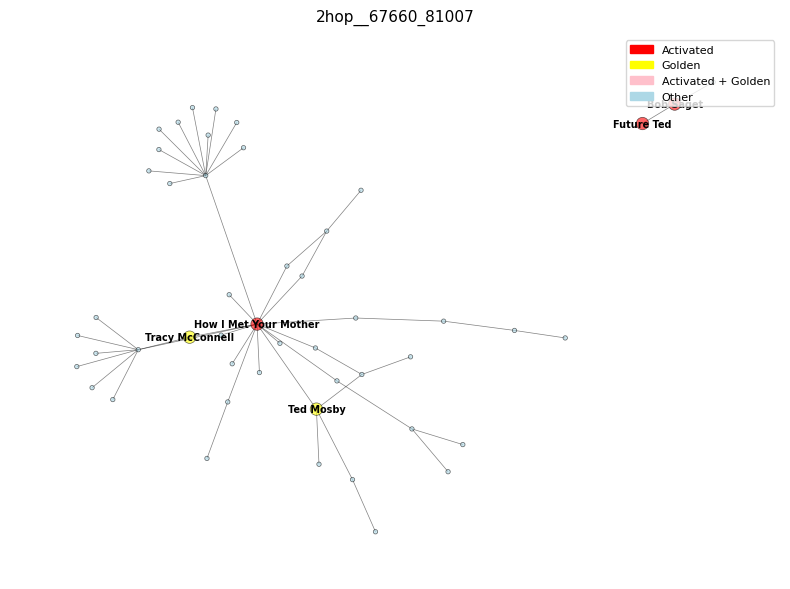

In [3]:
with open("/home/jovan/PycharmProjects/rag_project/files/graphs/2hop__67660_81007_retrieved.pkl","rb") as f:
    G = pickle.load(f)
visualize_graph(G, title='2hop__67660_81007')

/tmp/ipykernel_385925/1874629417.py:103: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.5)


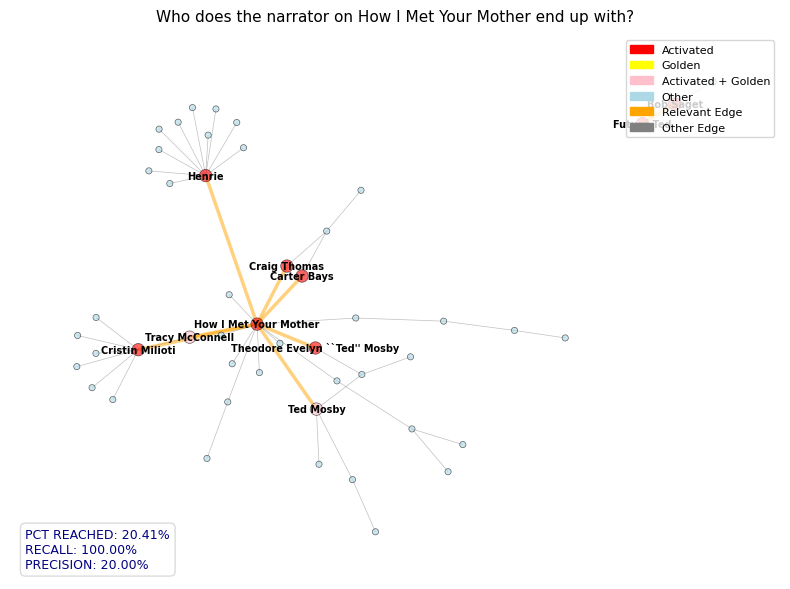

In [4]:
with open("/home/jovan/PycharmProjects/rag_project/files/graphs/2hop__67660_81007_diffusion_0.3_0.5.pkl","rb") as f:
    G = pickle.load(f)
visualize_diffusion(G, title=G.graph['description'])